# <center> CONFLICT FORECASTING

# <center> Project Description
    
## Project Description 

In conflict studies, the dominant methodolgical approach has historically relied on Null Hypothesis Significance Testing (NHST), which has shaped much of the research framework and outcomes. Seminal works such as those by Collier and Hoeffler (2004) and Fearon and Laitin (2003) are some examples. However, these studies typically fall short in predictive power as they lack rigorous out-of-sample testing and often omit crucial model fit measures. NHST's intrinsic limitations lead researchers to focus on the marginal predictors of conflict, possibly overlooking more significant underlying patterns and predictors that could enhance forecasting capabilities.

The current trajectory of research is moving towards a more predictive modeling approach, yet, there is a noticeable gap in comprehensive studies dedicated to forecasting nonviolent forms of conflict. Furthermore, the forecasting of war recurrence—a critical aspect of conflict dynamics—remains markedly underexplored. Addressing these gaps, the principal objective of this project is to develop robust and comprehensive machine learning (ML) models that are capable of forecasting conflict in all its primary forms, including nonviolent manifestations and the recurrence of warfare. By leveraging advanced ML techniques, the project aspires to not only understand the current landscape of conflicts but to predict future occurrences with a level of precision that has been previously unattainable.

### **Target Variables** 

1. violent political compaigns(0,1) 
2. nonviolent political compaigns(0,1) 
3. conflict(0,1)
4. civil war onset(0,1)
5. internal and internationalized internal conflicts(0,1)
6. internal conflicts(0,1)
7. internationalized conflicts(0,1)


### **Predictors**

1. pwt_hci: Human Capital Index
2. pwt_pop: Population (in millions)
3. pwt_rgdp: Real GDP at constant 2017 national prices (in million US$)
4. vdem_gender: Women political empowerment index
5. wdi_acel: Access to electricity (% of population)
6. wdi_afp: Armed forces personnel (% of total labor force)
7. wdi_afpt: Armed forces personnel, total
8. wdi_agedr: Age dependency ratio (% of working-age pop.)
9. wdi_araland: Arable land (% of land area)
10. wdi_armexp: Arms exports (SIPRI trend indicator values)
11. wdi_belmedinc: Proportion of people living below 50 percent of median income (%)
12. wdi_empprmne: Employment to population ratio, 15+, male (%) (national est.)
13. wdi_empprne: Employment to population ratio, 15+, total (%) (national est.)
14. wdi_expeduge: Government expenditure on education, total (% of government expenditure)
15. wdi_expmil: Military expenditure (% of GDP)
16. wdi_expmilge: Military expenditure (% of general government expenditure)
17. wdi_gdpcapcon2015: GDP per capita (constant 2015 US dollar)
18. wdi_gdpcapcur: GDP per capita (current US dollar)    
19. wdi_gdpgr: GDP growth (annual %)
20. wdi_gerp: School enrollment, primary (% gross)    
21. wdi_gerpf: School enrollment, primary, female (% gross)
22. wdi_gini: Gini index
23. wdi_gniatlcur: GNI, Atlas method (current US dollar)
24. wdi_incsh10h: Income share held by highest 10%
25. wdi_incsh10l: Income share held by lowest 10%
26. wdi_inflation: Inflation, consumer prices (annual %)
27. wdi_internet: Individuals using the Internet (% of population)
28. wdi_litrad: Literacy rate, adult total (% of people ages 15 and above)
29. wdi_litradf: Literacy rate, adult female (% of females ages 15 and above)
30. wdi_migration: Net migration
31. wdi_pop: Population, total
32. p_polity2: Revised Combined Polity Score
33. ht_regtype: Regime Type(has civil war)
34. ht_regtype1: Regime Type (simplified)
35. al_ethnic2000: Ethnic Fractionalization in the year 2000
36. al_language2000: Language Fractionalization in the year 2000
37: al_religion2000: Religion Fractionalization in the year 2000
38. vdem_corr: Political corruption index
39. vdem_delibdem: Deliberative democracy index
40. vdem_edcomp_thick: Electoral component index
41.vdem_libdem: Liberal democracy index
42. For all other variables: https://www.qogdata.pol.gu.se/data/codebook_std_jan24.pdf 

# <center> Data Merging

##### *** As of time, two datasets are used for merging: "NAVCO2-1_ForPublication.xlsx" and "qog_std_ts_jan24.csv". You can download them and then start working on further merging. Alternatively, you can directly start using the merged data("conflict"), which is exported at the end of this section. It is uploaded to GitHub repository. If you start directly working with the merged data, you can skip this section and start from preprocessing section*** 

In [660]:
# import navco  
import pandas as pd
navco = pd.read_excel("NAVCO2-1_ForPublication.xlsx")
navco.head()

,camp_name,id,year,campyearid,location,target,loc_iso,loc_cow,loc_vdem,territory,...,reliability,coding_notes,ra_initials,tccode,lccode,start_date_obsolete,end_date_obsolete,success,progress,outcomes_refs
0,Active Forces,1,1991,1_1991,Madagascar,Didier Radsiraka,450.0,580,125.0,NaN,...,2.0,http://www.iss.org.za/pubs/papers/89/Paper89.h...,NaN,580.0,580.0,5/1/1991,2/10/1993,0,3,Gow 1997
1,Active Forces,1,1992,1_1992,Madagascar,Didier Radsiraka,450.0,580,125.0,NaN,...,2.0,Reuters lba0000020011123dobp03sm6 ; ;,NaN,580.0,580.0,5/1/1991,2/10/1993,0,3,Gow 1997
2,Active Forces,1,1993,1_1993,Madagascar,Didier Radsiraka,450.0,580,125.0,NaN,...,2.0,Reuters lba0000020011120dp6o06zif ; ;,NaN,580.0,580.0,5/1/1991,2/10/1993,1,4,NaN
3,Afar insurgency,2,1991,2_1991,Djibouti,Djibouti regime,262.0,522,113.0,NaN,...,3.0,; UCDP provides extensive coverage of the cam...,NaN,522.0,522.0,11/12/1991,26/12/1994,0,1,FRUD was able to take over large areas of the ...
4,Afar insurgency,2,1992,2_1992,Djibouti,Djibouti regime,262.0,522,113.0,NaN,...,3.0,; UCDP provides extensive coverage of the cam...,NaN,522.0,522.0,11/12/1991,26/12/1994,0,2,"DJIBOUTI Human Rights Practices, 1992: Departm..."


In [661]:
# import Quality of Government(standard time series version) 
qog= pd.read_csv("qog_std_ts_jan24.csv")
qog.head()

/var/folders/jm/7hwdmxcx4bs2cypdgnly98gc0000gn/T/ipykernel_89386/3574565401.py:2: DtypeWarning: Columns (818,822,826,830,1318,1319) have mixed types. Specify dtype option on import or set low_memory=False.
  qog= pd.read_csv("qog_std_ts_jan24.csv")


,ccode,cname,year,ccode_qog,cname_qog,ccodealp,ccodecow,version,cname_year,ccodealp_year,...,yri_fem40,yri_fem4160,yri_fem61,yri_meanage,yri_medianage,yri_mp30,yri_mp35,yri_mp40,yri_mp4160,yri_mp61
0,4,Afghanistan,1946,4,Afghanistan,AFG,700,QoGStdTSjan24,Afghanistan 1946,AFG46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Afghanistan,1947,4,Afghanistan,AFG,700,QoGStdTSjan24,Afghanistan 1947,AFG47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,Afghanistan,1948,4,Afghanistan,AFG,700,QoGStdTSjan24,Afghanistan 1948,AFG48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Afghanistan,1949,4,Afghanistan,AFG,700,QoGStdTSjan24,Afghanistan 1949,AFG49,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Afghanistan,1950,4,Afghanistan,AFG,700,QoGStdTSjan24,Afghanistan 1950,AFG50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [662]:
# create (or rename current ones) new variables to match intersection variables 
navco['cow'] = navco["loc_cow"]
qog['cow'] = qog["ccodecow"]

In [663]:
# subset variables for merging: navco
navco1=navco[['cow', 'year', 'prim_meth']]
navco1

,cow,year,prim_meth
0,580,1991,1
1,580,1992,1
2,580,1993,1
3,522,1991,0
4,522,1992,0
...,...,...,...
2712,483,2008,0
2713,483,2009,0
2714,483,2010,0
2715,372,2008,0


In [664]:
# subset variables for merging: qog

qog1=qog[[
    "cow","year", "ucdp_type3","vdem_exbribe","wdi_inflation",
    "pwt_hci", "wdi_gniatlcur", "ht_regtype", "wdi_gdpcapcon2015",
    "wdi_gdpgr", "pwt_pop", "pwt_rgdp", "wdi_gdpcapcur","vdem_jucorrdc", 
    "p_polity2", "vdem_gender", "vdem_corr", "vdem_libdem",
    "vdem_delibdem", "vdem_edcomp_thick","vdem_excrptps","vdem_execorr","vdem_exembez", "wdi_araland",
    "wdi_migration", "wdi_pop", "wdi_agedr", "al_language2000",
    "al_ethnic2000", "al_religion2000","vdem_partip","vdem_partipdem", "atop_ally","atop_neutrality", 
    "atop_number", "ht_ipolity2", "ciri_kill", "ciri_physint", "ciri_polpris", "ciri_relfre",
    "ciri_speech", "ciri_tort", "ciri_wecon", "ciri_wopol"
]]

In [665]:
# left join:  we will work with this dataset

left= pd.merge(qog1, navco1, on=['cow', 'year'], how='left') 
left.shape

(15834, 45)

In [666]:
# why doesn't left join dataset have 15243 rows?
# because more compaign events happened in the same country and year.
# you can check

left[["cow", "year"]].duplicated().sum()
15834-591

15243

In [667]:
# given data availablity, we will focus on 1981-2013
conflict= left[(left['year'] > 1980) & (left['year'] < 2014)] 

In [668]:
# you can export it

conflict.to_excel("conflict.xlsx", index = False)  

In [669]:
conflict

,cow,year,ucdp_type3,vdem_exbribe,wdi_inflation,pwt_hci,wdi_gniatlcur,ht_regtype,wdi_gdpcapcon2015,wdi_gdpgr,...,ht_ipolity2,ciri_kill,ciri_physint,ciri_polpris,ciri_relfre,ciri_speech,ciri_tort,ciri_wecon,ciri_wopol,prim_meth
35,700,1981,NaN,1.896,NaN,NaN,NaN,20.0,NaN,NaN,...,0.264271,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
36,700,1982,NaN,1.896,NaN,NaN,NaN,20.0,NaN,NaN,...,0.264271,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
37,700,1983,NaN,1.896,NaN,NaN,NaN,20.0,NaN,NaN,...,0.264271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
38,700,1984,NaN,1.896,NaN,NaN,NaN,20.0,NaN,NaN,...,0.264271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
39,700,1985,NaN,1.896,NaN,NaN,NaN,20.0,NaN,NaN,...,0.264271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15662,551,2009,NaN,1.936,13.395255,2.209759,1.696765e+10,100.0,1125.089048,9.220348,...,7.166666,1.0,4.0,1.0,2.0,0.0,0.0,0.0,2.0,NaN
15663,551,2010,NaN,1.936,8.501761,2.222129,1.827767e+10,100.0,1198.304817,10.298223,...,7.166666,1.0,4.0,1.0,2.0,0.0,0.0,1.0,2.0,NaN
15664,551,2011,NaN,2.410,6.429397,2.275441,1.988820e+10,100.0,1222.979058,5.564602,...,7.166666,1.0,4.0,1.0,1.0,1.0,0.0,0.0,2.0,NaN
15665,551,2012,NaN,3.100,6.575900,2.330032,2.444480e+10,100.0,1273.161306,7.597593,...,7.166666,1.0,4.0,1.0,1.0,1.0,0.0,1.0,2.0,NaN


In [670]:
conflict.shape

(6905, 45)

# <center> Data Preprocessing

In [671]:
# create target variables 

conflict['violent'] = conflict['prim_meth']
conflict['violent'] = conflict['violent'].fillna(0)

conflict['nonviolent'] = 1 - conflict['prim_meth']
conflict['nonviolent'] = conflict['nonviolent'].fillna(0)

conflict['conflict'] = conflict['prim_meth'].notnull().astype(int)

conflict['civil_war'] = (conflict['ht_regtype'] == 19).astype(int)

conflict['int_conflict'] = conflict['ucdp_type3'].notnull().astype(int)

conflict = conflict.drop(columns=['prim_meth'])
conflict = conflict.drop(columns=['ucdp_type3'])
conflict = conflict.drop(columns=['ht_regtype'])

/var/folders/jm/7hwdmxcx4bs2cypdgnly98gc0000gn/T/ipykernel_89386/1942671216.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict['violent'] = conflict['prim_meth']
/var/folders/jm/7hwdmxcx4bs2cypdgnly98gc0000gn/T/ipykernel_89386/1942671216.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conflict['violent'] = conflict['violent'].fillna(0)
/var/folders/jm/7hwdmxcx4bs2cypdgnly98gc0000gn/T/ipykernel_89386/1942671216.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

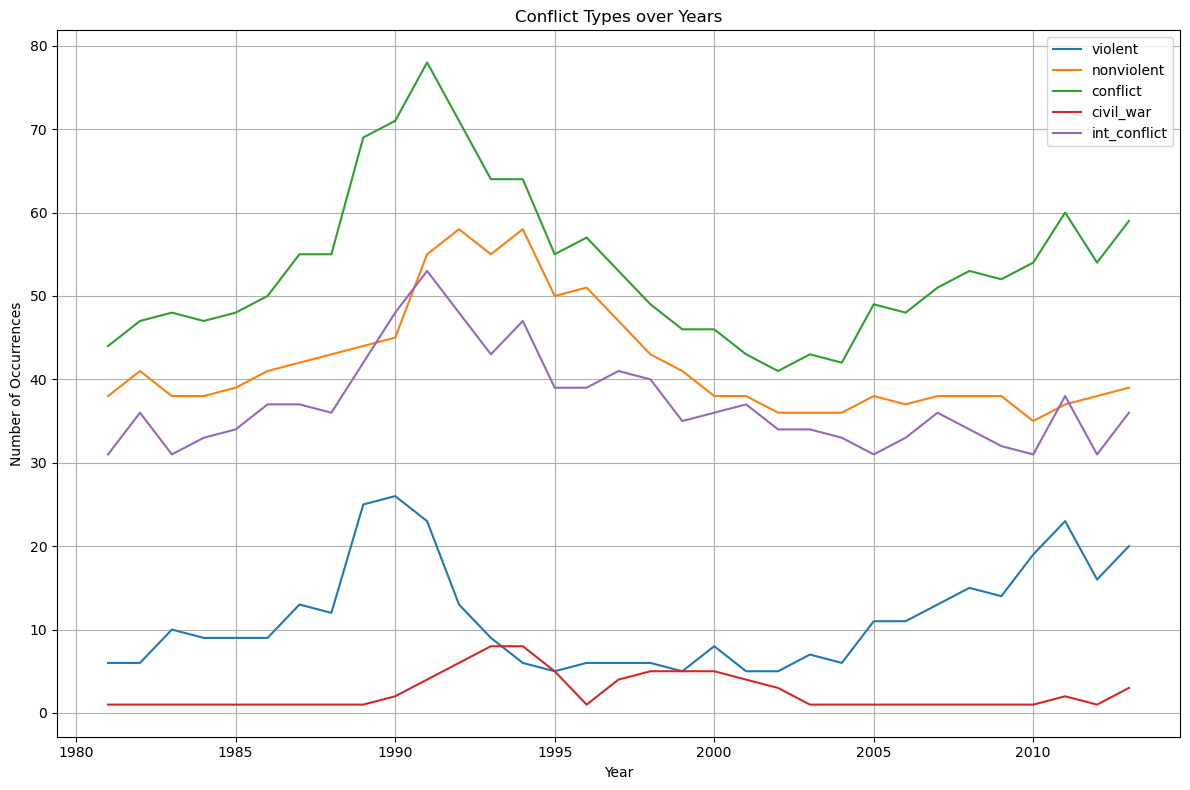

In [672]:
# Plot different types of conflicts over years 

import matplotlib.pyplot as plt



# Group data by 'year' and sum up all "1"s for each variable
annual_counts = conflict.groupby('year')[['violent', 'nonviolent', 'conflict', 'civil_war', "int_conflict"]].sum()

# Plot
plt.figure(figsize=(12, 8))  
for column in annual_counts.columns:
    plt.plot(annual_counts.index, annual_counts[column], label=column)

plt.title('Conflict Types over Years')
plt.xlabel('Year')
plt.ylabel('Number of Occurrences')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [673]:
# lag target variables. we should use models with lag variables as benchmark 
variables = ['violent', 'nonviolent', 'conflict', 'civil_war', 'int_conflict']

for var in variables:
    conflict[f'{var}_lag1'] = conflict[var].shift(1)

In [674]:
### let's explore missing observations 

na_count = conflict.isnull().sum()
na_sorted = na_count.sort_values(ascending=False)
na_sorted

pwt_hci              1921
wdi_inflation        1524
p_polity2            1310
wdi_gniatlcur        1221
ciri_wecon           1200
ciri_wopol           1131
vdem_gender          1119
ciri_speech          1115
ciri_physint         1114
ciri_kill            1099
atop_neutrality      1098
atop_number          1098
atop_ally            1098
pwt_pop              1097
pwt_rgdp             1097
ciri_tort            1092
ciri_polpris         1090
vdem_corr            1080
vdem_jucorrdc        1080
vdem_libdem          1077
vdem_partip          1056
vdem_partipdem       1056
vdem_execorr         1056
vdem_exembez         1056
vdem_excrptps        1056
vdem_edcomp_thick    1056
vdem_exbribe         1056
vdem_delibdem        1056
wdi_gdpcapcon2015     918
wdi_gdpgr             887
wdi_gdpcapcur         767
wdi_araland           605
ciri_relfre           584
ht_ipolity2           558
al_language2000       552
wdi_agedr             458
wdi_pop               458
wdi_migration         458
al_ethnic200

In [675]:
conflict= conflict.dropna()

In [676]:
conflict = conflict.drop(columns=['cow'])

In [677]:
conflict

,year,vdem_exbribe,wdi_inflation,pwt_hci,wdi_gniatlcur,wdi_gdpcapcon2015,wdi_gdpgr,pwt_pop,pwt_rgdp,wdi_gdpcapcur,...,violent,nonviolent,conflict,civil_war,int_conflict,violent_lag1,nonviolent_lag1,conflict_lag1,civil_war_lag1,int_conflict_lag1
124,1992,1.075,226.005421,2.515308,9.061842e+08,1086.438774,-7.187111,3.245886,10094.131,200.852220,...,0.0,0.0,0,0,0,1.0,0.0,1.0,0.0,0.0
125,1993,1.075,85.004751,2.514883,1.024263e+09,1197.580911,9.559412,3.195199,11059.070,367.279225,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
126,1994,1.075,22.565053,2.514457,1.216681e+09,1305.001064,8.302867,3.146519,11977.291,586.416133,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
127,1995,1.075,7.793219,2.514032,2.035220e+09,1488.020885,13.322333,3.112936,13572.945,750.604449,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
128,1996,1.075,12.725478,2.581189,2.823912e+09,1633.552004,9.099999,3.098700,14808.318,1009.977114,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15662,2009,1.936,13.395255,2.209759,1.696765e+10,1125.089048,9.220348,13.215139,35008.016,1150.941746,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
15663,2010,1.936,8.501761,2.222129,1.827767e+10,1198.304817,10.298223,13.605984,38613.223,1469.361450,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
15664,2011,2.410,6.429397,2.275441,1.988820e+10,1222.979058,5.564602,14.023203,40762.063,1644.456831,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0
15665,2012,3.100,6.575900,2.330032,2.444480e+10,1273.161306,7.597593,14.465150,43858.953,1729.647471,...,0.0,0.0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [678]:
from sklearn.model_selection import train_test_split

conflict = conflict.drop(columns=['year'])

X = conflict.drop(columns=['violent', 'nonviolent', 'conflict', 'civil_war', "int_conflict"])
y = conflict[['violent', 'nonviolent', 'conflict', 'civil_war', 'int_conflict']]



# Split the data based on the year
#X_train = X[X['year'] < 2005]
#y_train = y[X['year'] < 2005]  

#X_test = X[X['year'] >= 2005]
#y_test = y[X['year'] >= 2005]  


#X_train = X_train.drop(columns=['year'])
#X_test = X_test.drop(columns=['year'])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [679]:
## now we will create 5 versions of train and test sets as we have five targets(five y-s) and their lags(five X-s)

lagged_vars = ['violent_lag1', 'nonviolent_lag1', 'conflict_lag1', 'civil_war_lag1', 'int_conflict_lag1']

# Function to create train and test set by including only one specific lagged variable
def create_dataset_with_single_lagged_variable(X_train, X_test, include_var):
    
    X_train_modified = X_train.copy()
    X_test_modified = X_test.copy()
    

    vars_to_drop = [var for var in lagged_vars if var != include_var]
    X_train_modified.drop(columns=vars_to_drop, inplace=True)
    X_test_modified.drop(columns=vars_to_drop, inplace=True)
    
    return X_train_modified, X_test_modified

# Creating five train and test sets for features 
X1_train, X1_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'violent_lag1')
X2_train, X2_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'nonviolent_lag1')
X3_train, X3_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'conflict_lag1')
X4_train, X4_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'civil_war_lag1')
X5_train, X5_test = create_dataset_with_single_lagged_variable(X_train, X_test, 'int_conflict_lag1')


# Creating five train and test sets for target variables 
y1_train, y2_train, y3_train, y4_train, y5_train = y_train['violent'], y_train['nonviolent'], y_train['conflict'], y_train['civil_war'], y_train['int_conflict']
y1_test, y2_test, y3_test, y4_test, y5_test = y_test['violent'], y_test['nonviolent'], y_test['conflict'], y_test['civil_war'], y_test['int_conflict']

In [680]:
### let's now scale features


from sklearn.preprocessing import StandardScaler


scalers = [StandardScaler() for _ in range(5)]

# Scale each pair of datasets
X1_train_scaled = scalers[0].fit_transform(X1_train)
X1_test_scaled = scalers[0].transform(X1_test)

X2_train_scaled = scalers[1].fit_transform(X2_train)
X2_test_scaled = scalers[1].transform(X2_test)

X3_train_scaled = scalers[2].fit_transform(X3_train)
X3_test_scaled = scalers[2].transform(X3_test)

X4_train_scaled = scalers[3].fit_transform(X4_train)
X4_test_scaled = scalers[3].transform(X4_test)

X5_train_scaled = scalers[4].fit_transform(X5_train)
X5_test_scaled = scalers[4].transform(X5_test)

# <center> Modeling

## Variable Importance in Random Forest

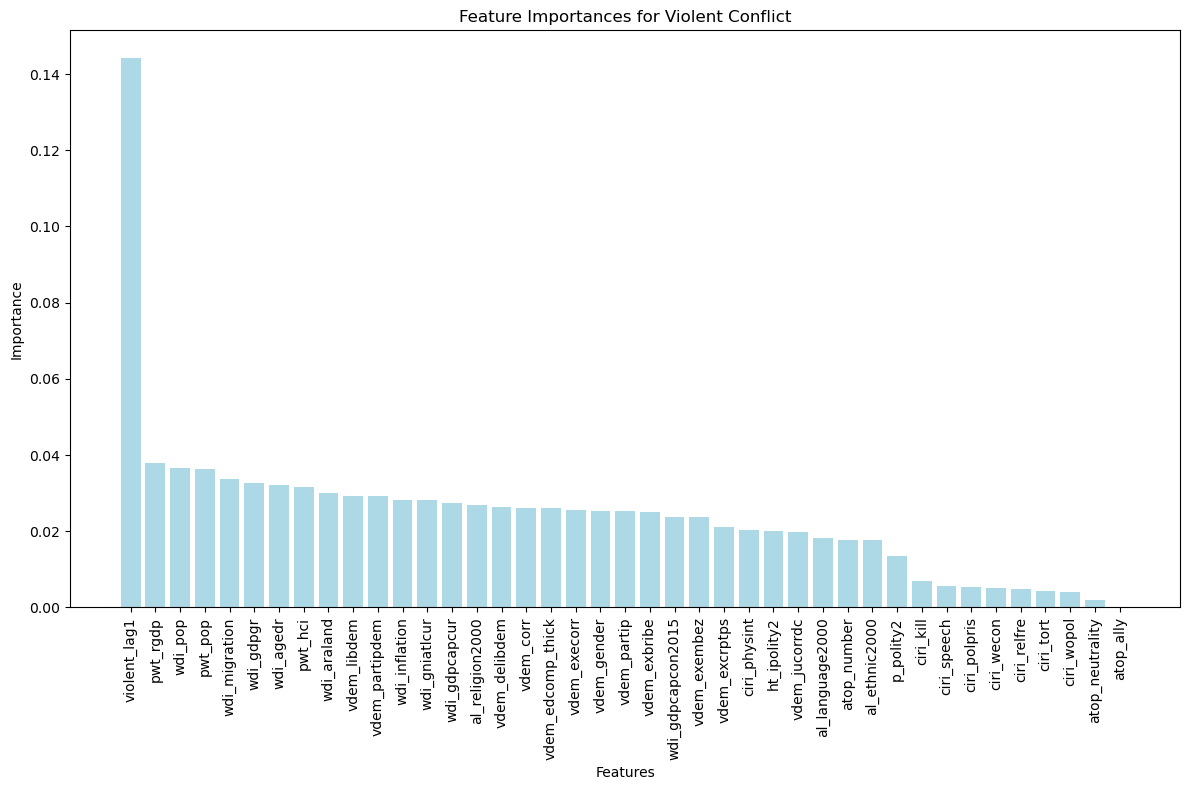

In [681]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# Initialize Random Forest classifier
clf1 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model to first dataset
clf1.fit(X1_train, y1_train)

# Get feature importance
importances1 = clf1.feature_importances_

# Generate feature names 
feature_names1 = X1_train.columns


# Sort feature importances in descending order
sorted_idx1 = np.argsort(importances1)[::-1]


# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for Violent Conflict")
plt.bar(range(len(importances1)), importances1[sorted_idx1], color="lightblue", align="center")
plt.xticks(range(len(importances1)), feature_names1[sorted_idx1], rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()  
plt.show()

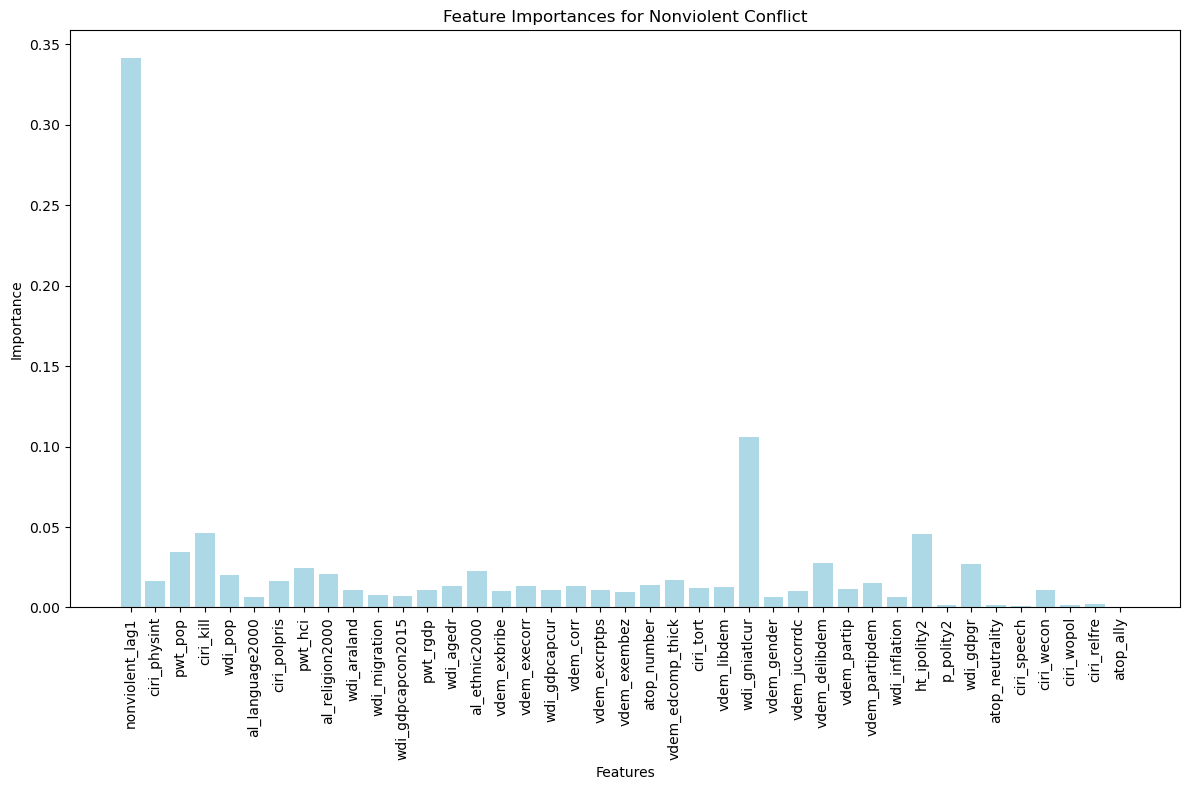

In [682]:
# Initialize Random Forest classifier
clf2 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model to second dataset
clf2.fit(X2_train, y2_train)

# Get feature importance
importances2 = clf2.feature_importances_

# Generate feature names 
feature_names2 = X2_train.columns


# Sort feature importances in descending order
sorted_idx2 = np.argsort(importances2)[::-1]


# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for Nonviolent Conflict")
plt.bar(range(len(importances2)), importances2[sorted_idx1], color="lightblue", align="center")
plt.xticks(range(len(importances2)), feature_names2[sorted_idx2], rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()  
plt.show()

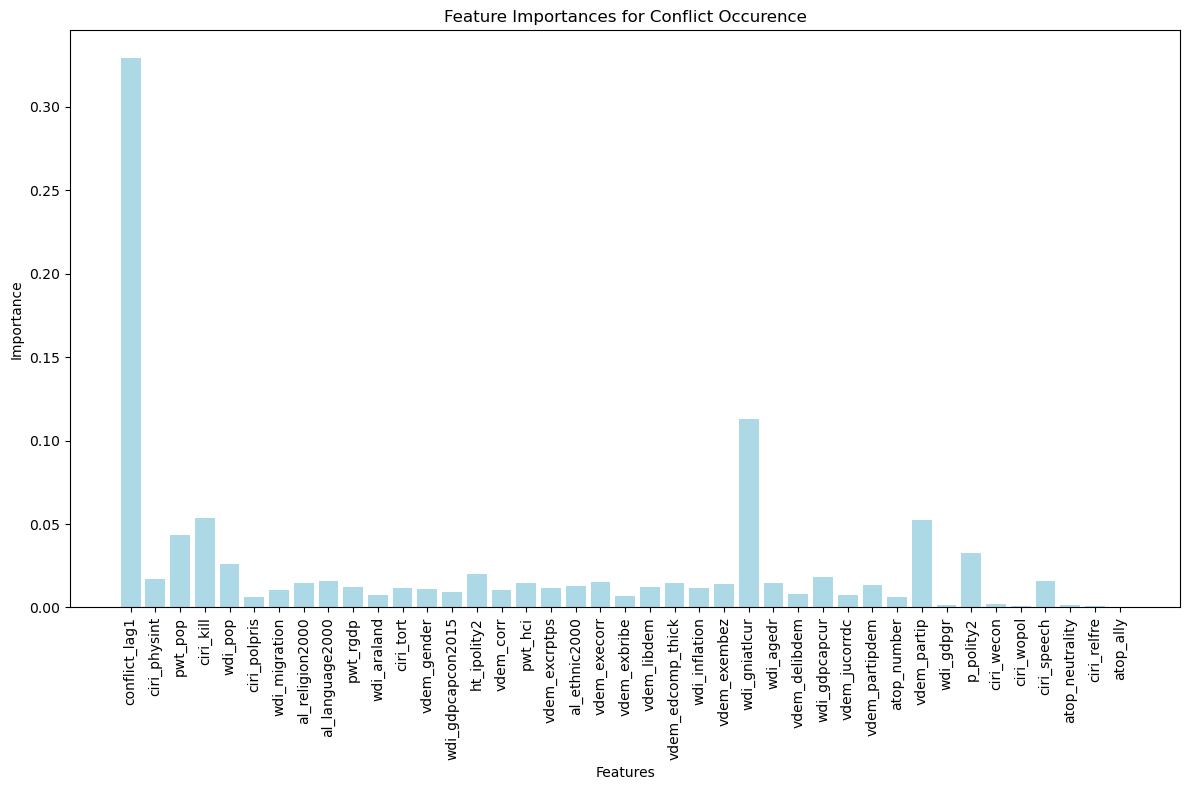

In [683]:
# Initialize Random Forest classifier
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model to third dataset
clf3.fit(X3_train, y3_train)

# Get feature importance
importances3 = clf3.feature_importances_

# Generate feature names 
feature_names3 = X3_train.columns


# Sort feature importances in descending order
sorted_idx3 = np.argsort(importances3)[::-1]


# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for Conflict Occurence")
plt.bar(range(len(importances3)), importances3[sorted_idx1], color="lightblue", align="center")
plt.xticks(range(len(importances3)), feature_names3[sorted_idx3], rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()  
plt.show()

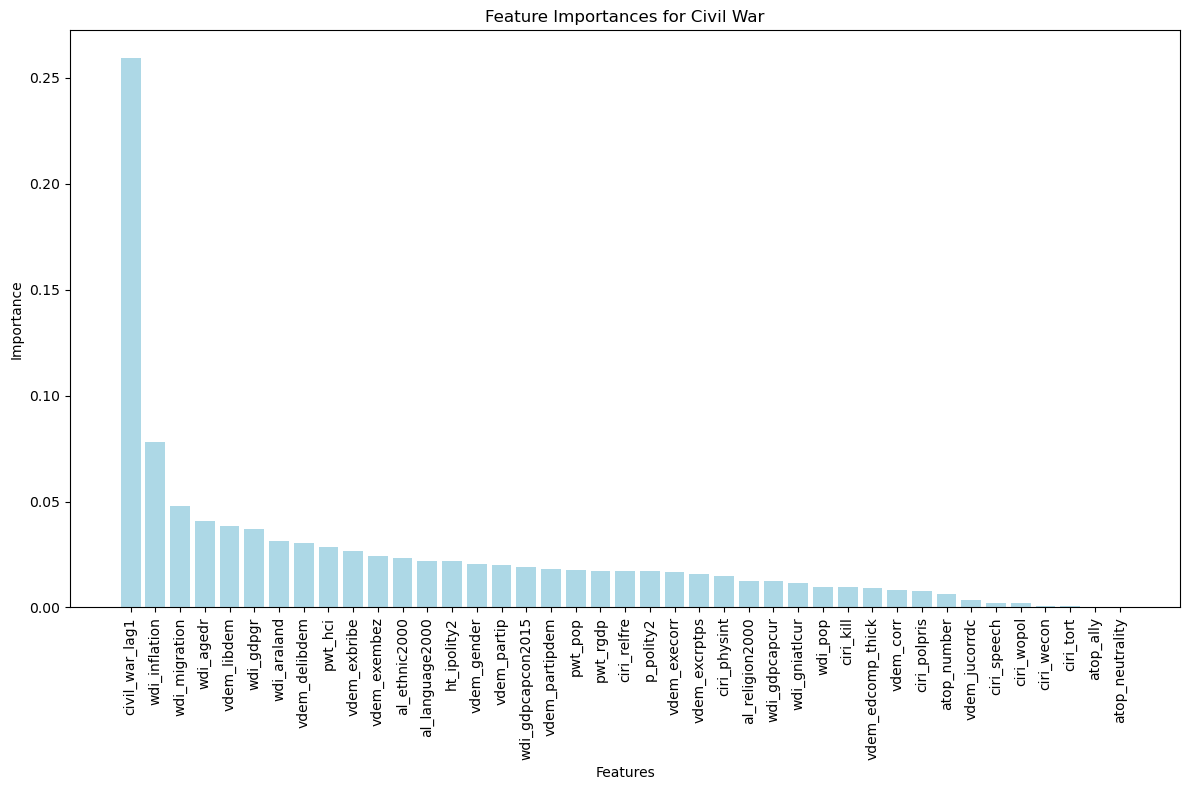

In [684]:
# Initialize Random Forest classifier
clf4 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model to fouurth dataset
clf4.fit(X4_train, y4_train)

# Get feature importance
importances4 = clf4.feature_importances_

# Generate feature names 
feature_names4 = X4_train.columns


# Sort feature importances in descending order
sorted_idx4 = np.argsort(importances4)[::-1]


# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for Civil War")
plt.bar(range(len(importances4)), importances4[sorted_idx4], color="lightblue", align="center")
plt.xticks(range(len(importances4)), feature_names4[sorted_idx4], rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()  
plt.show()

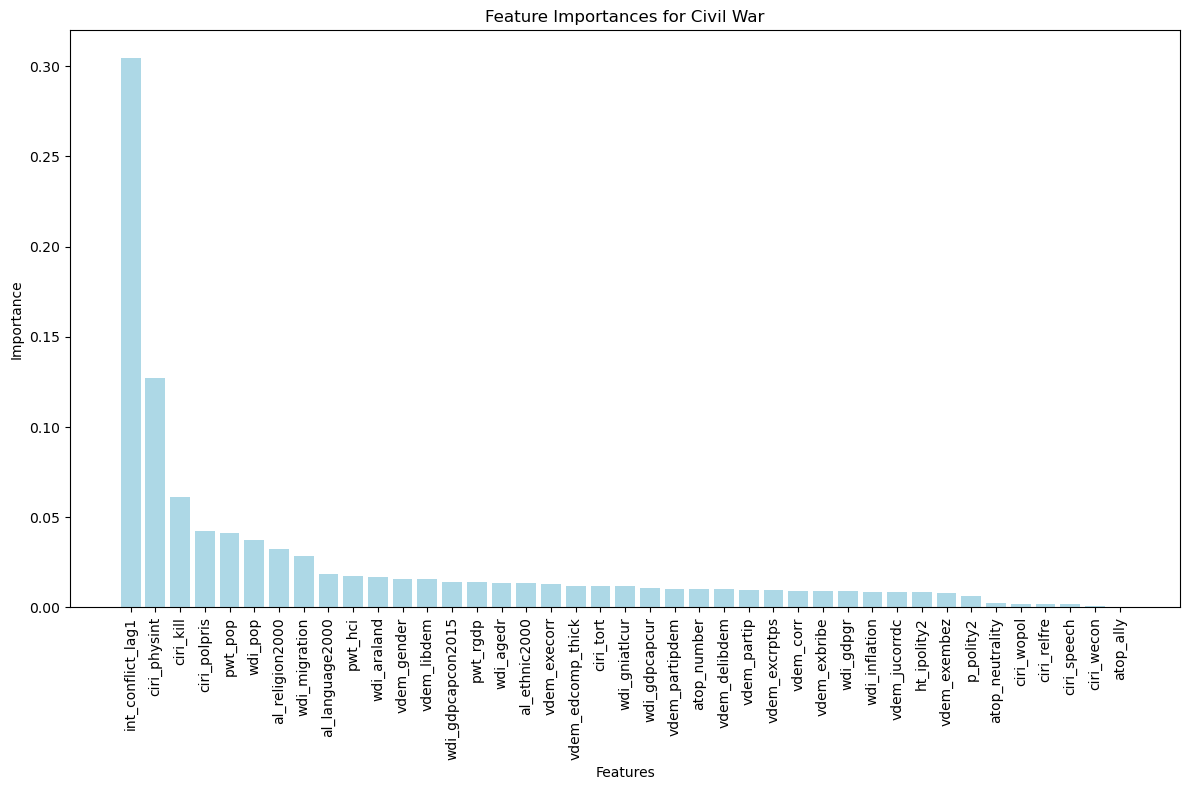

In [685]:
# Initialize Random Forest classifier
clf5 = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit model to fifths dataset
clf5.fit(X5_train, y5_train)

# Get feature importance
importances5 = clf5.feature_importances_

# Generate feature names 
feature_names5 = X5_train.columns


# Sort feature importances in descending order
sorted_idx5 = np.argsort(importances5)[::-1]


# Plot
plt.figure(figsize=(12, 8))
plt.title("Feature Importances for Civil War")
plt.bar(range(len(importances5)), importances5[sorted_idx5], color="lightblue", align="center")
plt.xticks(range(len(importances5)), feature_names5[sorted_idx5], rotation=90)
plt.ylabel("Importance")
plt.xlabel("Features")
plt.tight_layout()  
plt.show()

## Logistic Regression

Confusion Matrix:
[[638  11]
 [ 32  15]]


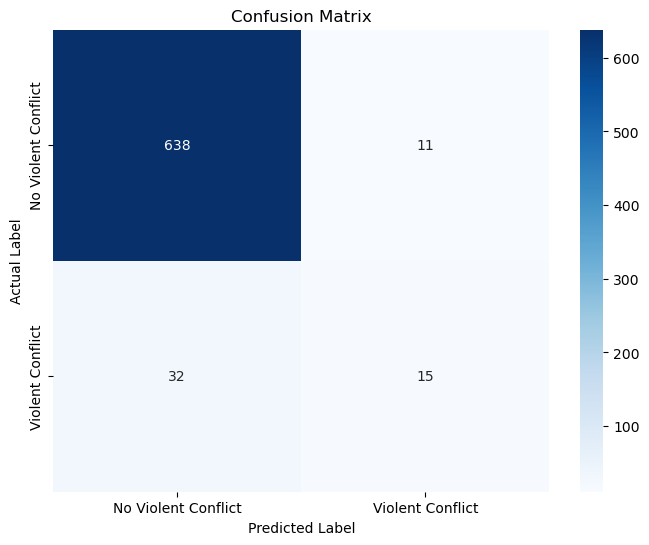

Accuracy: 0.9382
Precision: 0.5769
Recall: 0.3191
F1 Score: 0.4110
ROC AUC: 0.8608


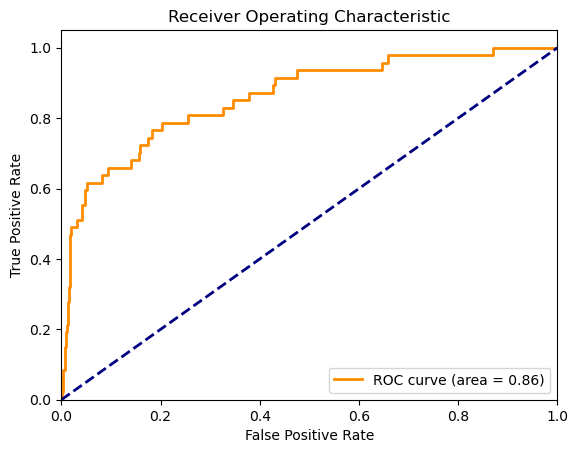

In [686]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, roc_curve, auc
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score



# Initialize Logistic Regression
logit_violent= LogisticRegression(max_iter=1000)

# Fit 
logit_violent.fit(X1_train_scaled, y1_train)

# Make predictions 
y1_pred = logit_violent.predict(X1_test_scaled)

# Calculate predicted probabilities for positive classs
y1_pred_proba = logit_violent.predict_proba(X1_test_scaled)[:, 1]


# Compute confusion matrix
cm = confusion_matrix(y1_test, y1_pred)
print("Confusion Matrix:")
print(cm)

# plot confusion matrix 
classes = ['No Violent Conflict', 'Violent Conflict']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# Accuracy
accuracy = accuracy_score(y1_test, y1_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y1_test,y1_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y1_test, y1_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y1_test, y1_pred)
print(f'F1 Score: {f1:.4f}')

# ROC AUC
roc_auc = roc_auc_score(y1_test, y1_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')





# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y1_test, y1_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[513  11]
 [ 24 148]]


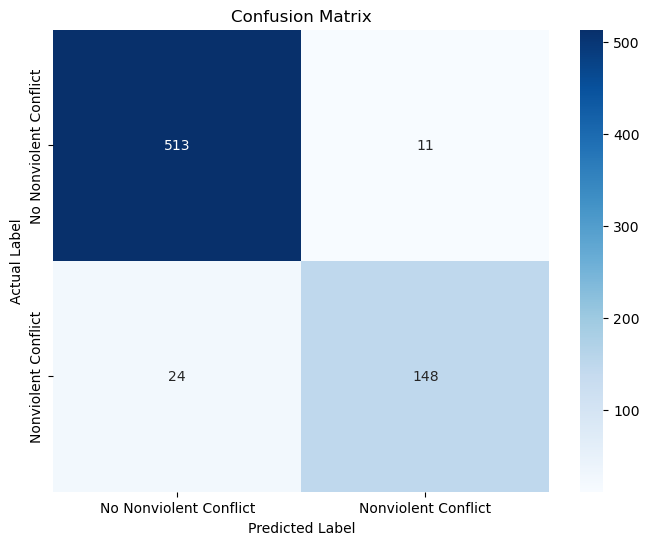

Accuracy: 0.9497
Precision: 0.9308
Recall: 0.8605
F1 Score: 0.8943
ROC AUC: 0.9803


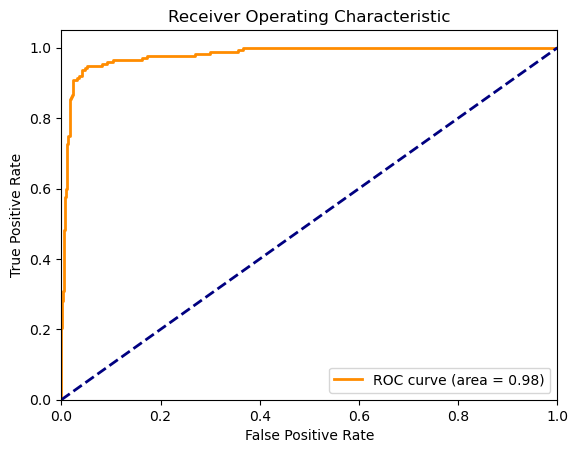

In [687]:
# Initialize Logistic Regression 
logit_nonviolent= LogisticRegression(max_iter=1000)

# Fit 
logit_nonviolent.fit(X2_train_scaled, y2_train)

# Make predictions 
y2_pred = logit_nonviolent.predict(X2_test_scaled)

# Calculate predicted probabilities 
y2_pred_proba = logit_nonviolent.predict_proba(X2_test_scaled)[:, 1]


# confusion matrix
cm = confusion_matrix(y2_test, y2_pred)
print("Confusion Matrix:")
print(cm)

# plot confusion matrix 
classes = ['No Nonviolent Conflict', 'Nonviolent Conflict']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# Accuracy
accuracy = accuracy_score(y2_test, y2_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y2_test,y2_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y2_test, y2_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y2_test, y2_pred)
print(f'F1 Score: {f1:.4f}')

# ROC AUC
roc_auc = roc_auc_score(y2_test, y2_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')





# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y2_test, y2_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[477   0]
 [216   3]]


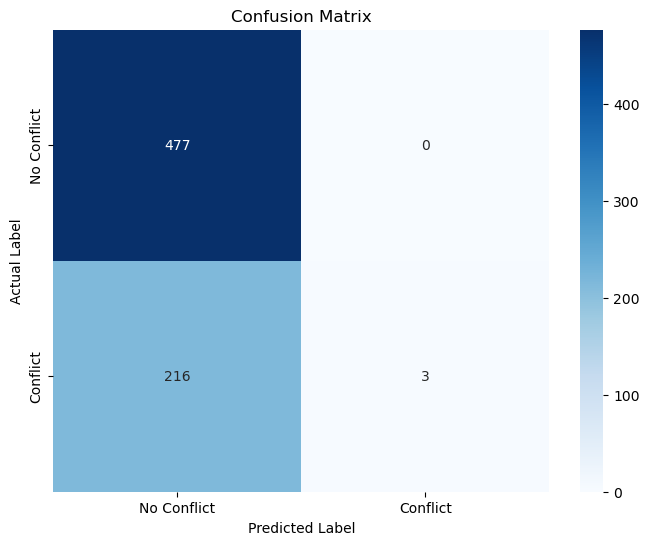

Accuracy: 0.6897
Precision: 1.0000
Recall: 0.0137
F1 Score: 0.0270
ROC AUC: 0.8757


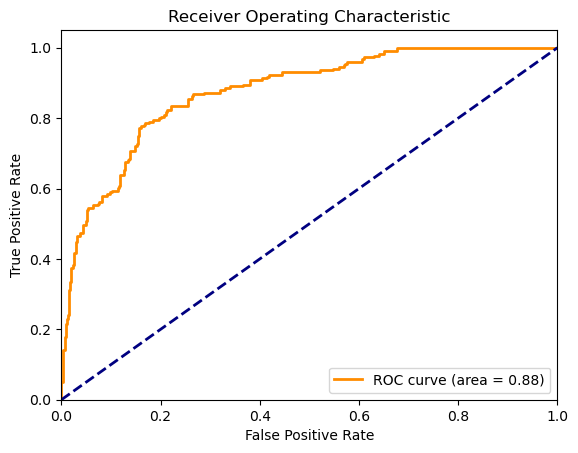

In [688]:
# Initialize Logistic Regression model
logit_conflict= LogisticRegression(max_iter=1000)

# Fit model 
logit_conflict.fit(X3_train_scaled, y3_train)

# Make predictions 
y3_pred = logit_violent.predict(X3_test_scaled)

# Calculate predicted probabilities for positive class
y3_pred_proba = logit_violent.predict_proba(X3_test_scaled)[:, 1]


# Compute confusion matrix
cm = confusion_matrix(y3_test, y3_pred)
print("Confusion Matrix:")
print(cm)

# plot confusion matrix 
classes = ['No Conflict', 'Conflict']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# Accuracy
accuracy = accuracy_score(y3_test, y3_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y3_test,y3_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y3_test, y3_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y3_test, y3_pred)
print(f'F1 Score: {f1:.4f}')

# ROC AUC
roc_auc = roc_auc_score(y3_test, y3_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')





# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y3_test, y3_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[691   0]
 [  0   5]]


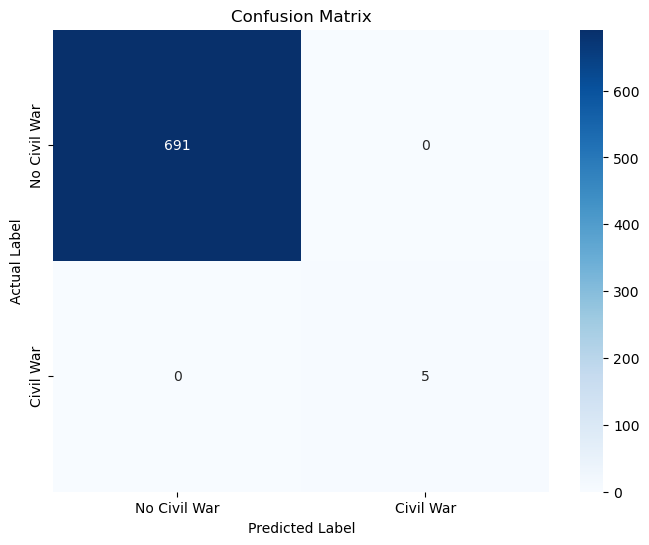

Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000
ROC AUC: 1.0000


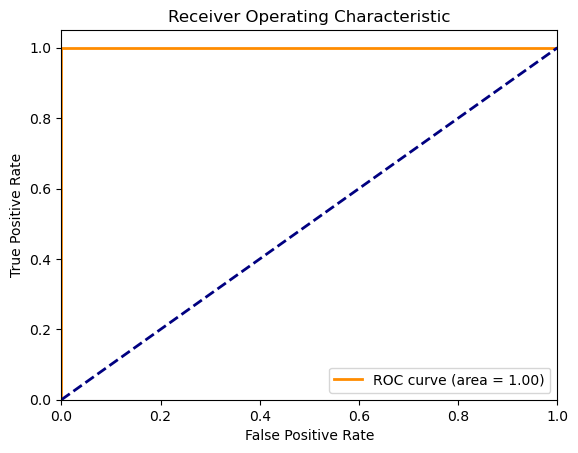

In [689]:
# Initialize Logistic Regression model
logit_civil_war= LogisticRegression(max_iter=1000)

# Fit model 
logit_civil_war.fit(X4_train_scaled, y4_train)

# Make predictions 
y4_pred = logit_civil_war.predict(X4_test_scaled)

# Calculate predicted probabilities 
y4_pred_proba = logit_civil_war.predict_proba(X4_test_scaled)[:, 1]


# Compute the confusion matrix
cm = confusion_matrix(y4_test, y4_pred)
print("Confusion Matrix:")
print(cm)

# plot confusion matrix 
classes = ['No Civil War', 'Civil War']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# Accuracy
accuracy = accuracy_score(y4_test, y4_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y4_test,y4_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y4_test, y4_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y4_test, y4_pred)
print(f'F1 Score: {f1:.4f}')

# ROC AUC
roc_auc = roc_auc_score(y4_test, y4_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')





# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y4_test, y4_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Confusion Matrix:
[[525  12]
 [ 19 140]]


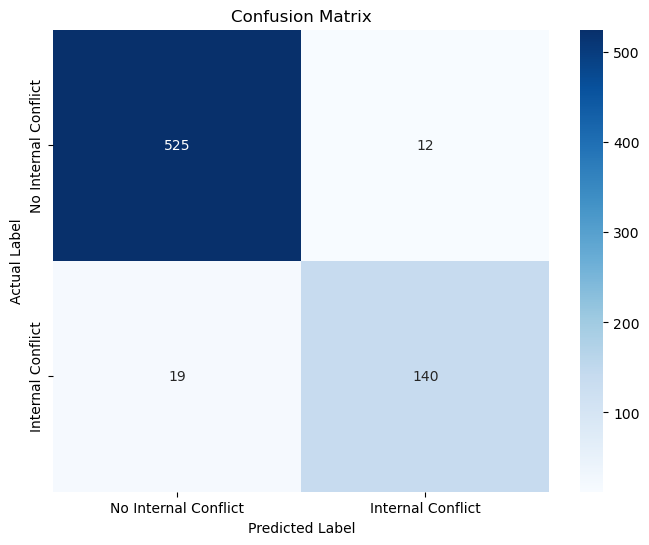

Accuracy: 0.9555
Precision: 0.9211
Recall: 0.8805
F1 Score: 0.9003
ROC AUC: 0.9748


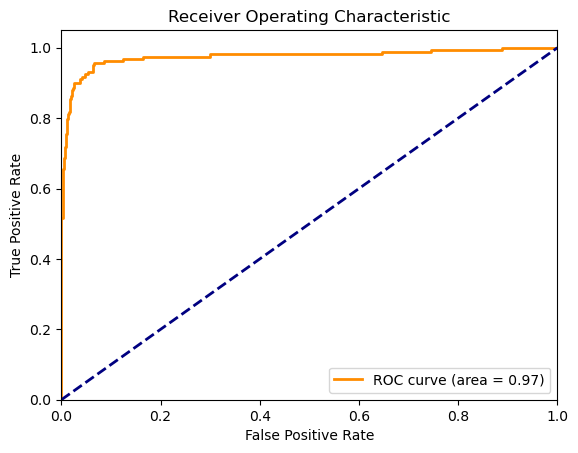

In [690]:
# Initialize Logistic Regression
logit_int_conflict= LogisticRegression(max_iter=1000)

# Fit model 
logit_int_conflict.fit(X5_train_scaled, y5_train)

# Make predictions 
y5_pred = logit_int_conflict.predict(X5_test_scaled)

# Calculate predicted probabilities
y5_pred_proba = logit_int_conflict.predict_proba(X5_test_scaled)[:, 1]


# Compute confusion matrix
cm = confusion_matrix(y5_test, y5_pred)
print("Confusion Matrix:")
print(cm)

# plot confusion matrix 
classes = ['No Internal Conflict', 'Internal Conflict']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()



# Accuracy
accuracy = accuracy_score(y5_test, y5_pred)
print(f'Accuracy: {accuracy:.4f}')

# Precision
precision = precision_score(y5_test,y5_pred)
print(f'Precision: {precision:.4f}')

# Recall
recall = recall_score(y5_test, y5_pred)
print(f'Recall: {recall:.4f}')

# F1 Score
f1 = f1_score(y5_test, y5_pred)
print(f'F1 Score: {f1:.4f}')

# ROC AUC
roc_auc = roc_auc_score(y5_test, y5_pred_proba)
print(f'ROC AUC: {roc_auc:.4f}')





# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y5_test, y5_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()